In [17]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.15.0


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import torch
from transformers import pipeline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


C:\Users\TANMAYA\.conda\envs\tfenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load Dataset
df = pd.read_csv(r"C:\Users\TANMAYA\Downloads\UScomments.csv", usecols=['comment_text'])
df = df.dropna()
df = df.head(1000)  # Use a small batch for initial testing

df.head()


,comment_text
0,Logan Paul it's yo big day ‼️‼️‼️
1,I've been following you from the start of your...
2,Say hi to Kong and maverick for me
3,MY FAN . attendance
4,trending 😉


In [4]:
from transformers import pipeline

# Load pre-trained sentiment analysis model
sentiment_pipeline = pipeline("sentiment-analysis")

# Define a safe sentiment function to avoid long input errors
def safe_sentiment(text):
    if len(text) > 1000:
        return "TooLong"  # Skip very long comments
    return sentiment_pipeline(text)[0]['label']

# Apply BERT sentiment analysis to each comment using the safe function
df['sentiment'] = df['comment_text'].apply(safe_sentiment)

# Display the result
df.head()



No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


,comment_text,sentiment
0,Logan Paul it's yo big day ‼️‼️‼️,POSITIVE
1,I've been following you from the start of your...,POSITIVE
2,Say hi to Kong and maverick for me,POSITIVE
3,MY FAN . attendance,POSITIVE
4,trending 😉,POSITIVE


In [5]:
# Convert Sentiment to Numeric (for DNN)
label_encoder = LabelEncoder()
df['satisfaction'] = label_encoder.fit_transform(df['sentiment'])  # 0=NEGATIVE, 1=POSITIVE


In [6]:
# Feature Engineering
df['length'] = df['comment_text'].apply(len)
X = df[['length']]  # Features
y = df['satisfaction']  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Build and train DNN
model = Sequential([
    Dense(16, input_dim=1, activation='relu'),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=16, verbose=1)




Epoch 1/10


50/50 [==============================] - 2s 4ms/step - loss: 3.8553 - accuracy: 0.4300
Epoch 2/10
50/50 [==============================] - 0s 4ms/step - loss: 3.8180 - accuracy: 0.4775
Epoch 3/10
50/50 [==============================] - 0s 6ms/step - loss: 1.6101 - accuracy: 0.5300
Epoch 4/10
50/50 [==============================] - 0s 4ms/step - loss: 2.2704 - accuracy: 0.4275
Epoch 5/10
50/50 [==============================] - 0s 4ms/step - loss: 0.7820 - accuracy: 0.4888
Epoch 6/10
50/50 [==============================] - 0s 4ms/step - loss: 1.5273 - accuracy: 0.4650
Epoch 7/10
50/50 [==============================] - 0s 5ms/step - loss: 1.1251 - accuracy: 0.4888
Epoch 8/10
50/50 [==============================] - 0s 5ms/step - loss: 1.4232 - accuracy: 0.5238
Epoch 9/10
50/50 [==============================] - 0s 4ms/step - loss: 1.0956 - accuracy: 0.5063
Epoch 10/10
50/50 [==============================] - 0s 4ms/step - loss: 2.8804 - accuracy: 0.4475


In [14]:
# Evaluation
y_pred = (model.predict(X_test) > 0.5).astype("int32").flatten()  # Flatten to shape (200,)
print(classification_report(y_test, y_pred))


7/7 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.58      0.48      0.52       127
           1       0.29      0.38      0.33        72
           2       0.00      0.00      0.00         1

    accuracy                           0.44       200
   macro avg       0.29      0.29      0.28       200
weighted avg       0.47      0.44      0.45       200



C:\Users\TANMAYA\.conda\envs\tfenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\TANMAYA\.conda\envs\tfenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\TANMAYA\.conda\envs\tfenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
history = model.fit(X_train, y_train, epochs=10, batch_size=16, verbose=1)


Epoch 1/10
50/50 [==============================] - 0s 4ms/step - loss: 1.0831 - accuracy: 0.4900
Epoch 2/10
50/50 [==============================] - 0s 4ms/step - loss: 2.1583 - accuracy: 0.4850
Epoch 3/10
50/50 [==============================] - 0s 4ms/step - loss: 0.9399 - accuracy: 0.4737
Epoch 4/10
50/50 [==============================] - 0s 4ms/step - loss: 0.8928 - accuracy: 0.4863
Epoch 5/10
50/50 [==============================] - 0s 4ms/step - loss: 0.4092 - accuracy: 0.4737
Epoch 6/10
50/50 [==============================] - 0s 4ms/step - loss: 1.0554 - accuracy: 0.5312
Epoch 7/10
50/50 [==============================] - 0s 6ms/step - loss: 1.0103 - accuracy: 0.5000
Epoch 8/10
50/50 [==============================] - 0s 5ms/step - loss: 0.7401 - accuracy: 0.4750
Epoch 9/10
50/50 [==============================] - 0s 7ms/step - loss: 0.9648 - accuracy: 0.4913
Epoch 10/10
50/50 [==============================] - 0s 4ms/step - loss: 1.3176 - accuracy: 0.5213


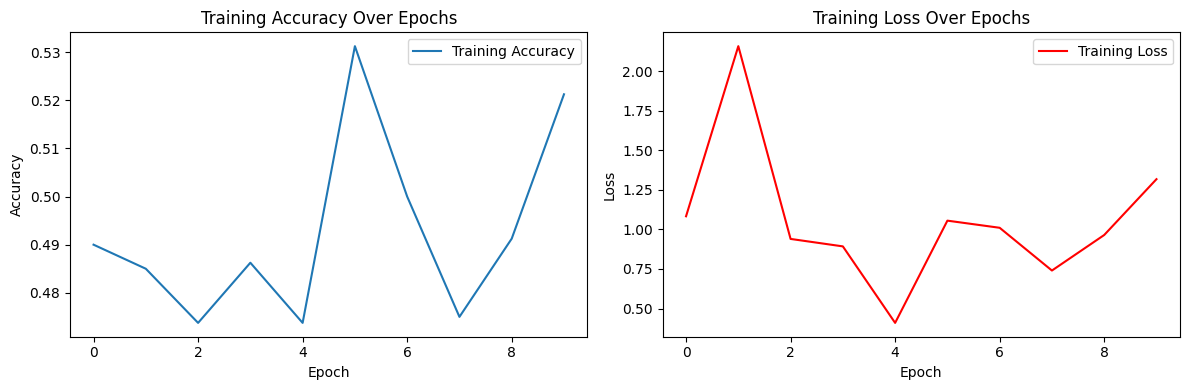

In [16]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [17]:
print("Unique classes in y_test:", np.unique(y_test))
print("Unique classes in y_pred:", np.unique(y_pred))


Unique classes in y_test: [0 1 2]
Unique classes in y_pred: [0 1]


In [18]:
# Ensure binary only (drop any invalid labels)
valid_indices = (y_test <= 1) & (y_pred <= 1)
y_test = y_test[valid_indices]
y_pred = y_pred[valid_indices]


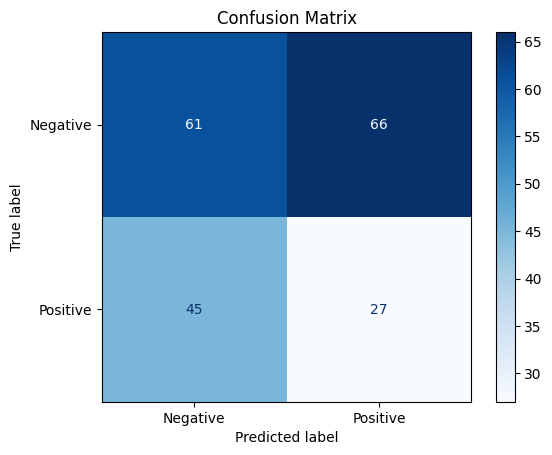

In [20]:
# Generate and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()